In [12]:
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler, StandardScaler

In [13]:
df = pd.read_csv('data/red-wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Transform the data 
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df).transform(df)

df_transformed = pd.DataFrame(data=min_max_scaler.fit(df).transform(df),
                              columns = list(min_max_scaler.get_feature_names_out()))

df_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [15]:
X = df_transformed.drop(columns='quality')
y = df_transformed.quality

# Train Test Spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=.7)

In [16]:
# Number of columns, excluding target label
input_shape =  [len(df_transformed.columns)-1]
input_shape

[11]

In [17]:
# Fully Connect Neural Net
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape), # first layer for inputs/feats
    layers.Dense(units=512, activation='relu'), # 1st hidden layer
    layers.Dense(units=512, activation='relu'),  # 2nd hidden layer
    layers.Dense(units=1), # Regression: last layer with no activation function
])

# 1) Add Loss and Optimizer

Before training the network we need to define the loss and optimizer we'll use. Using the model's `compile` method, add the Adam optimizer and MAE loss.

In [18]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=20,
)

Epoch 1/20


5/5 [==============================] - 0s 21ms/step - loss: 0.2789 - val_loss: 0.1318
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1358 - val_loss: 0.1172
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1189 - val_loss: 0.1062
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1109 - val_loss: 0.1097
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1071 - val_loss: 0.1042
Epoch 6/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1060 - val_loss: 0.1011
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1033 - val_loss: 0.1029
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1020 - val_loss: 0.1000
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1021 - val_loss: 0.0993
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0999 - val_loss: 0.0988
Epoch 11/20
5/5 [============================

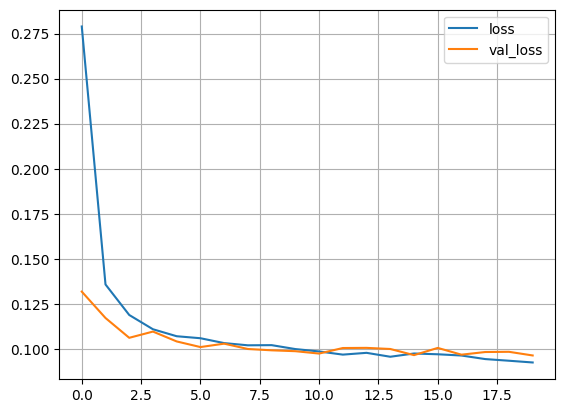

In [20]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot(grid=True, legend=True);
history_df['val_loss'].plot(grid=True, legend=True);